In [5]:
# 토큰화 작업 수행하기

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts = ['You are the Best', 'You are the Nice']

tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>')
tokenizer.fit_on_texts(texts)

# 텍스트 데이터를 정수 인덱스 형태로 변환합니다.
sequences = tokenizer.texts_to_sequences(texts)

# 이진 형태로 인코딩합니다.
binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')

print(tokenizer.word_index)
print('--------------------')

print(f'sequences: {sequences}\n')
print(f'binary_vectors:\n {binary_results}\n')

# 원-핫 형태로 인코딩합니다.
# print(to_categorical(sequences))

test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences: {test_seq}')

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
--------------------
sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors:
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

test sequences: [[2, 3, 4, 1]]


In [6]:
# 데이터셋 다운받기

from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
# 데이터 형태 확인하기

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [8]:
# 첫 번째 데이터 확인하기

print(X_train[0])
print('-------')
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
-------
1


In [9]:
# IMDB 데이터셋에서 가장 빈번하게 사용되는 세 개의 단어
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key

for i in range(1, 4):
    print('{} 번째로 가장 많이 쓰인 단어 = {}'.format(i, imdb_get_word_index[i]))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1 번째로 가장 많이 쓰인 단어 = the
2 번째로 가장 많이 쓰인 단어 = and
3 번째로 가장 많이 쓰인 단어 = a


In [10]:
# 데이터를 동일한 길이로 맞추기

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print('Before pad_sequences: ', len(X_train[0]))

pad_X_train = pad_sequences(X_train, maxlen=max_len, padding = 'pre')
pad_X_test = pad_sequences(X_test, maxlen=max_len, padding = 'pre')

print('After pad_sequences: ', len(pad_X_train[0]))

Before pad_sequences:  218
After pad_sequences:  500


In [11]:
# Embedding층을 사용하여 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32,
                    input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 모델 학습 시키기
history = model.fit(pad_X_train, y_train, batch_size = 32, epochs = 30, validation_split = 0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - acc: 0.6461 - loss: 0.5962 - val_acc: 0.8698 - val_loss: 0.3136
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - acc: 0.9187 - loss: 0.2214 - val_acc: 0.8766 - val_loss: 0.2947
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - acc: 0.9736 - loss: 0.1096 - val_acc: 0.8714 - val_loss: 0.3178
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - acc: 0.9921 - loss: 0.0517 - val_acc: 0.8678 - val_loss: 0.3438
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - acc: 0.9976 - loss: 0.0235 - val_acc: 0.8696 - val_loss: 0.3675
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - acc: 0.9994 - loss: 0.0122 - val_acc: 0.8668 - val_loss: 0.3940
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - acc: 0.9999 - loss: 0.0066 - val_acc: 0.8706 - val_loss: 0.4109
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - acc: 1.0000 - loss: 0.0041 - val_acc: 0.8670 - val_loss: 0.4354
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2

In [14]:
model.evaluate(pad_X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.8562 - loss: 0.7652


[0.7680003046989441, 0.8584399819374084]

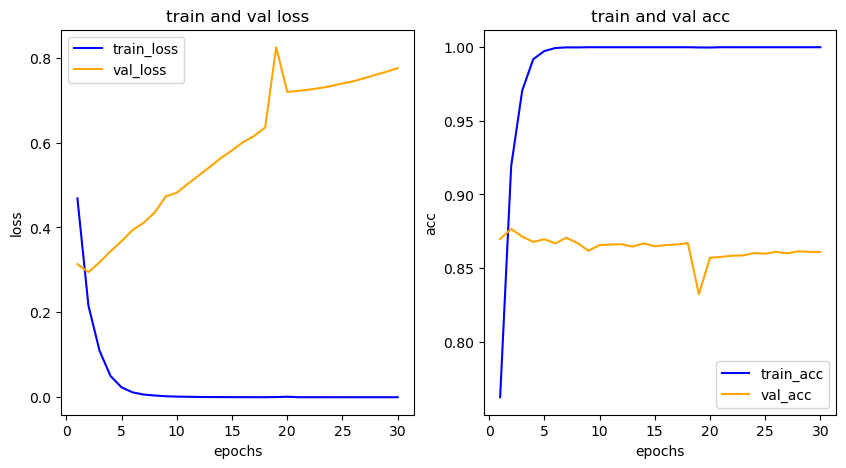

In [19]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


plt.show()